# Solution of the 1D Poisson problem using our own FEM code

In [1]:
import import_hack

source module for methodsNM imported.


In [2]:
from methodsnm.mesh_1d import *
from methodsnm.visualize import *

On the mesh, we define a finite element space:

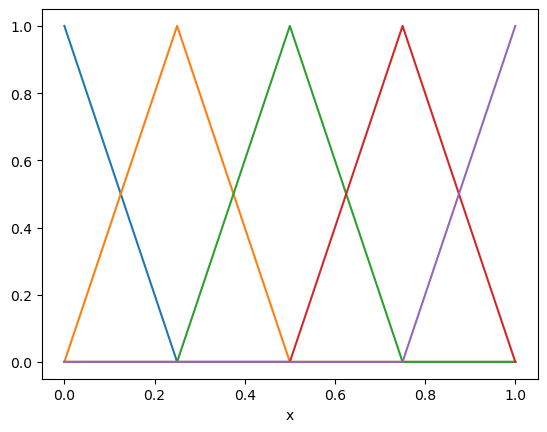

In [3]:
from methodsnm.fes import *
ne = 4
mesh = Mesh1D((0,1),ne)
fes = P1_Segments_Space(mesh)
#fes = Pk_IntLeg_Segments_Space(mesh,3)
DrawShapes(fes)

On the mesh, with the given finite element space, we define the variational formulation:
$$
\int_{\Omega} \nabla u \cdot \nabla v dx + \int_{\Omega} u v dx = \int_{\Omega} f v dx
$$
Replacing 
* $u \leadsto u_h = \sum_j u_j \phi_j $ and
* $v \leadsto v_h = \phi_i$
we obtain a linear system:

In [4]:
from methodsnm.forms import *
from methodsnm.formint import *

try: #include solution module (if exists)
    from methodsnm.solution import *
except:
    pass

blf = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
#blf += LaplaceIntegral(c)
blf += MassIntegral(c)
blf.assemble()

lf = LinearForm(fes)
f = GlobalFunction(lambda x: np.sin(3*x)**2, mesh = mesh)
lf += SourceIntegral(f)
lf.assemble()

blf.matrix

In [5]:
print(blf.matrix, "\n", lf.vector)

  (0, 0)	0.125
  (1, 1)	0.25
  (2, 2)	0.25
  (3, 3)	0.25
  (4, 4)	0.125 
 [0.01676945 0.1185303  0.21554581 0.14427962 0.03049466]


Next, we solve the linear system. And we use a direct solver from scipy for that (for now):

In [6]:
uh = FEFunction(fes)
from scipy.sparse.linalg import spsolve
uh.vector = spsolve(blf.matrix, lf.vector)

Finally, we can visualize the solution:

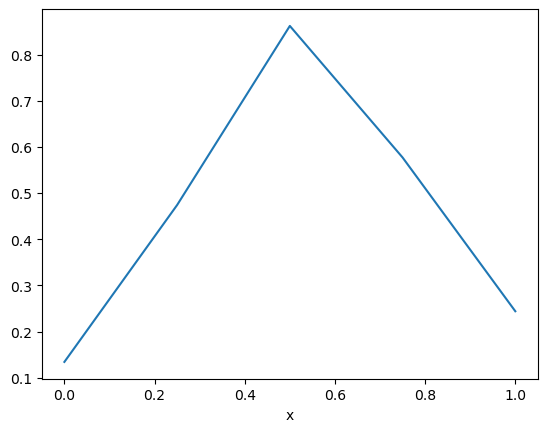

In [7]:
DrawFunction1D(uh)

This problem now contained several simplifications, that can be removed step by step:
 * qualitative evaluation only (no quantitative evaluation, no convergence study)
 * boundary conditions are natural. Different boundary conditions make it more difficult
 * 1D $\leadsto$ 2D
 * P1 (low order) discretization vs. P2 and higher order discretizations